In [2]:
import tensorflow.keras as keras

In [3]:
import tensorflow as tf

The scope is to categorize hand written digits from 0-9 using NN 

Load mnist open dataset

In [4]:
mnist = tf.keras.datasets.mnist

 Τhe x_train data is the "features." In this case, the features are pixel values of the 28x28 images of these digits 0-9. <br />
 The y_train is the label (is it a 0,1,2,3,4,5,6,7,8 or a 9?)

In [5]:
(x_train,y_train),(x_test, y_test) = mnist.load_data()

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [7]:
print(y_train[0])

5


In [8]:
import matplotlib.pyplot as plt

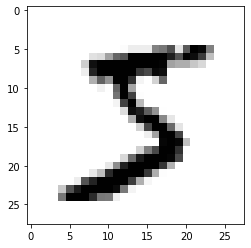

In [9]:
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [10]:
plt.show()

Lets "normalize" the data. This typically involves scaling the data to be between 0 and 1, or maybe -1 and positive 1. In our case, each "pixel" is a feature, and each feature currently ranges from 0 to 255. Not quite 0 to 1.

In [11]:
x_train = tf.keras.utils.normalize(x_train, axis=1)

In [12]:
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [13]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

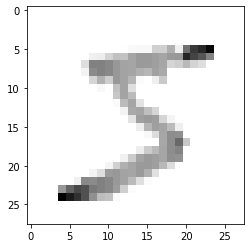

In [14]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

Since we preprocessed the data lets **create the MODEL** (would be Sequential (as most of the time))
<br/> That means the things are going to go in direct order. A feed forward model.

In [15]:
model = tf.keras.models.Sequential()

Now, it is needing to take this 28x28 image, and make it a flat 1x784.

In [16]:
# input layer
model.add(tf.keras.layers.Flatten())

This will serve as our input layer. It's going to take the data we throw at it, and just flatten it for us. Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node.

In [17]:
# first layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. 

Let's add another identical layer for good measure.

In [18]:
# second layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))


In [19]:
# output layer:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))


 The output layer has 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is.
 

Now we need to **"compile"** the model. This is where we pass the settings for actually optimizing/training the model we've defined.

In [20]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Adam is a good optimizer to start with. <br/>

Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

Now, we fit the model

In [21]:
model.fit(x_train, y_train, epochs=3)


Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2684 - accuracy: 0.9215
Epoch 2/3
1875/1875 [==============================] - 2s 908us/step - loss: 0.1092 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 2s 932us/step - loss: 0.0729 - accuracy: 0.9769


Getting a high accuracy and low loss might mean that the model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). This is why we need to test on out-of-sample data

In [22]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

313/313 [==============================] - 0s 706us/step - loss: 0.0898 - accuracy: 0.9726
0.089763343334198
0.972599983215332


**Save** the model for the future work


In [23]:
model.save('epic_num_reader.model')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: epic_num_reader.model\assets


**Load** it back

In [24]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

Finally,Lets **make predictions!**

In [26]:
predictions = new_model.predict(x_test)


In [27]:
print(predictions)


[[1.50207242e-11 1.75796657e-08 5.91824971e-07 ... 9.99996781e-01
  1.01639728e-08 2.26255303e-09]
 [6.44867770e-11 1.66347891e-05 9.99981523e-01 ... 2.73107603e-09
  1.85331537e-08 8.24319115e-14]
 [1.25459712e-06 9.98625159e-01 1.56485214e-04 ... 4.34708491e-04
  2.10405255e-04 1.97427971e-06]
 ...
 [1.25654891e-08 1.00330780e-07 1.84901818e-08 ... 9.63318780e-06
  1.37057668e-06 1.17979056e-04]
 [1.05613788e-06 6.73830016e-07 8.53210736e-07 ... 7.37459118e-07
  8.11839418e-04 4.56465621e-09]
 [6.39982488e-07 2.02180117e-09 2.20671026e-07 ... 1.45888371e-10
  4.48835422e-08 1.29039206e-08]]


In [30]:
import numpy as np
print(np.argmax(predictions[1]))



2


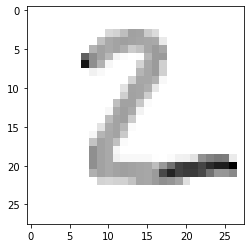

In [31]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()